# 확률의 기초

확률(probability)는 어떤 일이 일어날 가능성(chance)의 정도를 나타내는 말이다. 

대부분의 사람들은 어떤 일이 일어날 가능성에 대하여 생각하고 그에 따라 예측하고 행동한다. 예를 하늘에 구름이 많고 흐리면 비가 올 가능성이 높다는 것은 선사 시대에 살았던 사람들도 생각할 수 있었을 것이다. 비가 올 것 같은 날에 편의점 주인이 우산을 평소보다 많이 준비하는 행동은 너무 자연스럽다.
또한 투자에 관심이 많은 사람들은 어떤 주식 종목이 "언제 얼마나 오를 것이냐 "에 대한 예측을 위하여 많은 노력을 기울일 것이다. 

사람들은 날마다 많은 일에 대한 **가능성을 생각하며 그에 따라 예측하고** 의사 결정을 한다. 그렇지만 예측한 가능성대로 세상이 움직여 주지 않는 경우가 많다. 
왜냐하면 사건의 결과가 우연성(randomness)를 지니고 있기 때문이다. 기상 예보가 틀렸다고 너무 화내지 말자. 기후변화가 진행되는 최근의 기상은 예측하기 쉽지 않다.

이렇게 확률은 어떤 일이 일어날 가능성의 정도를 나타내는 말이지만, 동일한 사건에 대한 가능성을 여러 사람에게 묻는다면 사람마다 그 가능성의 정도가 다를 수 있다. 이는 사람마다 경험과 지식의 차이 때문일 수 있고 생각의 방식에 따라서 가능성은 달라질 수 있다.

이 장에서는 확률에 대한 정의와 확률 계산을 위한 기초적인 규칙을 알아보도록 하겠다.

먼저 필요한 파이썬 라이브러리를 불러오자.

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import scipy.stats as stats
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 그림 그리기를 위한 코드 
# 강의의 범위를 벋어나므로 문법을 익히지 않아도 된다.

import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib import rc
plt.rcParams["figure.figsize"] = (6,4)   # 그림 크기 조정

## 확률이란?

어떤 일이 일어날 가능성의 정도를 나타내는 **확률은 0과 1사이의 값으로 표시되며 확률이 0 이면 사건이 일어나지 않는 경우이고 1 이면 무조건 일어나는 것을 말한다.**

어떤 사건의 확률을 말할 때 다음과 두 가지 방법으로 확률을 계산한다.

- 논리적 확률

  논리적 확률는 먼저 일어날 수 있는 모든 가능한 결과을 생각하고 모든 결과의 가능성을 논리적인 방법으로 유추하는 것이다. 예를 들어 가능한 모든 결과들이 동일하다는 가정 하에서(Outcomes are equally likely) 확률을 계산하는 방법이 논리적 확률의 예이다. 
  
  예를 들어 주사위를 던지는 경우, 여섯 개의 눈이 나올 가능성이 모두 같다는 논리적인 판단으로 각각의 눈이 나올 확률을 1/6으로 정하는 방법이다. 가능성이 같다는 근거는 정육면체가 가지는 수학적, 물리적 특성을 고려한 것이다. 
  
  여기서 두 가지 용어, 표본공간과 사건을 소개한다.

 + 표본 공간 (sample space) : 모든 가능한 결과를 모아 놓은 집합으로 $S$ 로 표기한다. 
 + 사건 (event): 표본 공간 $S$ 의 부분 집합

  예를 들면 주사위를 던질 때 가능한 결과는 1부터 6까지의 6개의 면이다. 따라서 표본 공간은 다음과 같다.

  $$ S = \{ 1,~2,~3,~4,~5,~6 \} $$
 
 짝수가 나올 사건을 생각하면 이는 $event = \{ 2,~4,~6 \}$으로  표시할 수 있다.

 표본 공간에 속한 **모든 결과들의 가능성이 같다고 할 때** 어떤 사건($event$)이 일어날 확률은 다음과 같이 계산할 수 있다.

  $$ P(\text{event}) = \frac {\text{사건} (event) \text{ 안의 원소의 수}} {\text{표본 공간 }S \text{ 안의 원소의 수}}  $$

  **질문:** 우리는 주사위를 던질 때 모든 결과의 가능성은 "논리적으로" 같다고 생각한다. 그렇다면 윷놀이를 할 때 윷을 하나 던진다고 하면 두 개의 결과의 가능성은 같은가? 윷을 던졌을 때 "배"가 나올 확률은 "등"이 나올 확률과 같은가? 논리적인 확률은?

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Korea_yut_pan.jpg/440px-Korea_yut_pan.jpg" width="300"></center>

<center> 그림출처-위키백과 </center>


- 경험적 확률

  경험적 확률은 어떤 사건이 일어난 상대적인 횟수, 즉 상대 도수(relative frequency)를 사건이 일어난 또는 일어날 확률로 사용하는 경험적 개념이다.

  $$ P(\text{event}) = \frac {\text{사건} (event) \text{ 이 일어난 횟 수 }} {\text{전체 실험 또는 시행 횟수}}  $$

 **질문** 윷놀이를 할 때 윷 하나를 던진다고 하면 "등"이 나올 확률은 어떻게 구할 수 있을까? 하나의 윷의 생김새로 보면 "배"와"등"이 나올 가능성이 같아 보이지 않는다. 논리적인 확률을 고려할 수 있을까? 계속 던져서 "등"이 나온 횟수를 전체 던진 횟수로 나눈 것이 경험적 확률이다. 그런데 얼마나 많이 던져야 할까?




## 확률의 주관성

어떤 일이 일어날 가능성에 대한 생각은 다를 수 있다.  어떤 사건이 일어날 확률은 개인의 믿음과 경험의 정도에 따라서 다를 수 있다.

- 경제가 내년에 회복될 가능성은? 좀 더 명확하게 내년 경제성장률이 3%이상일 가능성은? [내년 경기 전망에 대한 뉴스](https://www.yna.co.kr/view/AKR20201228127500002)

- 친구에게 잘 섞인 52장의 카드에서 1장을 뽑으라고 했는데, 친구가 스페이드 에이스(♠️A)를 뽑았다. 이제 친구에게 나머지 51장의 카드에서 두 번째 카드를 뽑으라고 했을 때  "스페이드 에이스(♠️A)가 다시 뽑힐 가능성은?" 이라고 물어보면 무슨 대답을 할까? 똑같은 상황이 벌어지면 외계인은 어떤 대답을 할까?

그런데 카드 게임을 해본 [외계인이 있을 가능성](https://www.scientificamerican.com/article/how-many-aliens-are-in-the-milky-way-astronomers-turn-to-statistics-for-answers/)은 얼마나 될까?

## 확률 분포

우리는 앞 절에서 남자의 키에 대한 분포, 정규분포에 대하여 알아보았다. 다시 강조하면 확률 분포는 어떤 값이 임의로(randomly) 주어지는 경우 나타날 수 있는 **값들의 상대적인 가능성** 을 알려주는 역활을 한다. 정확하게 말하면 가능한 모든 결과, 즉 표본 공간의 모든 결과에 대한 가능성을 확률로 나타낸 것이다.


이제 확률분포에 대한 몇 개의 예제를 보면서 확률 계산의 기초를 배워보자.


### 주사위

주사위를 던질 때 표본 공간은 1 부터 6까지의 6개의 숫자이고 확률 분포는 다음과 같다.

| 가능한 결과 |  1  |  2 | 3 | 4  |  5 |  6 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 확률 | $\frac{1}{6}$ |$\frac{1}{6}$ |$\frac{1}{6}$ |$\frac{1}{6}$ |$\frac{1}{6}$ |$\frac{1}{6}$ |

우리는 위와 같은 확률 분포로부터 주어진 사건의 확률을 계산할 수 있다. 예를 들어 하나의 주사위를 던질 경우 눈의 값이 5 이상 나올 확률은 어떻게 구할까?

일단 눈의 값이 5 이상인 사건은 5 또는 6이 나올 사건이다. 주사위의 모든 눈이 나올 가능성이 같다면, 위에서 본 논리적 확률의 정의에 따라서 2/6 으로 다음과 같이 구할 수 있다. 

$$
\begin{align*}
P(\text{ 5 이상}) & = P(\text{ 5 또는 6}) \\
& = \frac {\text{사건} (event) \text{ 안의 원소의 수}} {\text{표본 공간 }S \text{ 안의 원소의 수}} \\
& = \frac{2}{6} 
\end{align*}
$$

위에서 눈의 값이 5 이상인 사건의 확률은 5가 나올 사건의 확률과 6이 나올 사건의 확률을 더해서 구할 수도 있다. 주사위 하나를 던질 때 5와 6이 동시에 나올 수 없다는 사실에 유의하자.

$$
\begin{align*}
P(\text{ 5 또는 6}) & = P(\text{ 5}) + P(\text{ 6}) \\
 & = \frac{1}{6} + \frac{1}{6} \\
 & =  \frac{2}{6}
\end{align*}
$$


주사위를 던질 경우에 대한 확률분포를 다음과 같이 그림으로 그려보자. 가능한 값은 6개이고 각각의 확률이 1/6인 것을 높이가 $1/6= 0.1667$ 이고 너비가 1인 막대 그래프로 표시할 수 있다. 즉, 확률 분포를 그래프로 나타낸 것이다.

눈이 5 와 6인 경우 빨간 막대로 표시했으며 두 막대의 크기를 합하면 $1/6 + 1/6 =2/6$이다. 6개 막대의 면적을 모두 합하면 1이 된다.

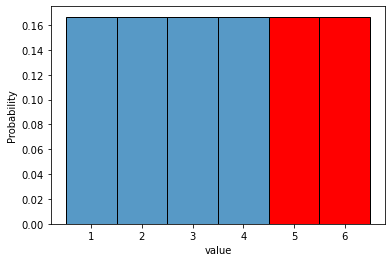

In [3]:
dice = pd.DataFrame({'value': np.arange(1,7)})

# 4이상인 막대를 빨간색으로 변환 (아래 코드는 강의범위를 벗어나므로 문법은 익히지 않아도 된다)
p = sns.histplot(dice.value, bins=7, stat='probability', discrete=True)
for rectangle in p.patches:
    if rectangle.get_x() >= 4:
        rectangle.set_facecolor('red')

### 확률의 기초 규칙

먼저 확률을 계산하는 가장 기초적인 두 가지  규칙을 알아보자.

- 표본공간의 확률은 1이다. 즉, 가능한 모든 사건이 일어날 확률은 1이다

$$ P(S) = 1 $$

- 여사건(complement of event)의 확률은 1에서 주어진 사건의 확률을 빼면 된다.

$$ P(\text{not event}) = 1 -P(\text{event}) $$


예를 들어 주사위의 눈이 1과 같거나 큰 사건은 표본공간 $S$와 같은 사건이다. 따라서 확률은 1이다. 또한 주사위의 눈이 4 이하일 사건은 5 이상일 사건의 여사건이므로 다음과 같이 계산한다. 

$$ P(\text{ 4 이하})= 1- P(\text{ 5 이상}) = 1-2/6 = 4/6 $$


### 자료의 분포: 성인 남자의 키

앞 절에서 논의한 체력측정 데이터에서 **한 명의 남자를 임의로 선택하면** 키가 180cm 이상일 가능성은 얼마나 될까? 

체력측정 데이터에 있는 모든 남자들이 선택될 가능성이 모두 같으므로 (주사위를 던지는 경우와 동일하게) 임의로 선택한 남자의 키가 180cm 이상일 가능성은 다음과 같이 구할 수 있다. 

$$ P(\text{ 키 } \ge { 180}) = \frac{\text{키가 180 이상인 성인 남자의 수}}{\text{모든 성인 남자의 수}} $$

위의 확률을 체력측정 데이터에서 계산해 보자.


In [4]:
url = "https://ilovedata.github.io/teaching/bigdata2/data/physical_test_2018_data.csv"
physical_data = pd.read_csv(url, sep=',', encoding = 'utf-8-sig')

In [5]:
height_adult_man = physical_data.loc[ (physical_data["TEST_SEX"] == "M") & (physical_data["TEST_AGE"] >= 19), ["ITEM_F001"]]
height_adult_man.columns = ["height"]

In [6]:
height_adult_man.head(10)

,height
0,159.2
2,175.2
3,178.7
7,174.9
15,175.3
16,179.8
17,180.9
19,163.6
21,176.6
23,167.7


데이터프레임의 메소드 `count()` 는 행의 수를 세어준다.

In [7]:
height_adult_man.count()

height    920
dtype: int64

위의 자료로 부터 모든 성인 남성의 수는 920명인 것을 알았다. 이제 키가 180 cm 이상인 남자의 수를 알아보자. 

In [8]:
height_adult_man.loc[height_adult_man['height'] >= 180].count()

height    106
dtype: int64

키가 180 cm 이상인 남자의 수가 106명이므로 임의로 선택한 남자의 키가 180 이상일 확률은 다음과 같다.

$$
\begin{align*}
P(\text{ 키 > 180}) & = \frac{\text{키가 180 이상인 성인 남자의 수}}{\text{모든 성인 남자의 수}} \\
 & = \frac{106}{920} \\ 
 & = \underbrace{\frac{1}{920}+ \frac{1}{920}+  \cdots + \frac{1}{920}}_{106} \\
 & =  0.1152
\end{align*}
$$


체력측정 데이터에서 성인 남자의 히스토그램을 그려보았다. 히스도그램의 막대 높이는 도수(`frequency`) 가 아닌 상대도수(relative frequency)로 지정하였다. 

$$
\text{상대도수 } = \frac{\text{도수}}{\text{전체 자료의 수}}
$$

키기 180 이상인 사람들에 대한 막대를 빨간색으로 표시하였다. 아래 빨간색 부분이 히스토그램의 전체 면적에서 차지하는 비율이 0.1152이다.

히스도그램에서 상대 도수를 나타내는 선택명령문은 `density=True` 이다.

```
height_adult_man.plot.hist(y='height', bins=25, density=True)
```




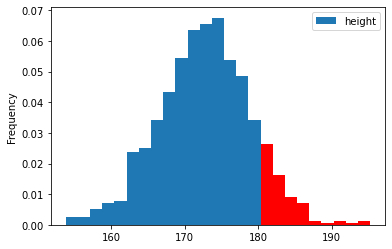

In [9]:
# 히스토그램
p= height_adult_man.plot.hist(y='height', bins=25, density=True)

# 키가 180이상인 막대를 빨간색으로 변환 (아래 코드는 강의범위를 벗어나므로 문법은 익히지 않아도 된다)
for rectangle in p.patches:
    if rectangle.get_x() >= 180:
        rectangle.set_facecolor('red')

### 정규분포: 확률 실험 

이제 앞 절에서 논의한 정규분포를 생각해 보자. 

앞에서 본 체력측정 데이터에서 성인 남자의 키의 평균과 표준편차가 아래와 같다.

In [10]:
height_adult_man.describe()

,height
count,920.000000
mean,172.695435
std,6.246716
min,153.800000
25%,168.700000
50%,172.750000
75%,176.800000
max,195.200000


 앞 절에서 배운 것처럼 정규분포와 성인 남자의 키의 분포는 매우 유사하다.  성인 남자의 키가 정규분포 $𝑁(172.7,6.22^2)$를 따른다고 가정하자. 정규분포에서 임의로 추출한 남성의 키가 180 cm 이상인 확률을 어떻게 구할 수 있을까?
 
 
동전을 던지는 확률 실험을 수행하는 방법과 유사하게  정규분포 $𝑁(172.7,6.22^2)$에서 10,000 명의 남자들의 키를 임의로 추출해 보자. 즉 정규분포 $𝑁(172.7,6.22^2)$에서 10,000 개의 난수(random number)를 추출해 보자.

파이썬은 $(0,1)$ 사이에서 난수를 임의로 선택해주는 기본적인 함수 `np.random.rand()` 을 제공하며, 더 나아가 다양한 확률 분포에서 임의로 난수를 추출해주는 함수들이 있다. 

평균이 $m$ 이고 표준편차가 $s$ 인 정규분포에서 $n$개의 난수를 추출하는 함수는  `np.random.normal(m,s,n)`이다.

이제 정규분포 $𝑁(172.7,6.22^2)$ 에서 10,000 명을 임의로 추출하고 180 이상의 키를 가진 남자의 비율을 구해보자. 

In [11]:
N = 10000
normal_sample = pd.DataFrame({'height':np.random.normal(172.7, 6.22, N)})
normal_sample.head(10) 

,height
0,178.211140
1,172.441572
2,174.978891
3,163.926727
4,169.092190
5,161.934007
6,174.711311
7,179.062991
8,177.284923
9,174.327686


In [12]:
# 추출한 남자들의 수: N
N

10000

In [13]:
# 키가 180cm 이상인 남자의 수: count180
count180 =  normal_sample.loc[normal_sample['height'] >= 180].count()
count180

height    1245
dtype: int64

In [14]:
# 키가 180cm 이상인 남자의 비율
count180/N

height    0.1245
dtype: float64

정규분포에서 임의로 추출한 10,000 명의 키에 대한 히스토그램에서 180cm 이상인 남자들이 나타난 부분을 표시해 보자. 위에서 구한 키가 180cm 이상인 남자의 비율는 아래 히스토그램의 빨간 부분의 면적이다. 

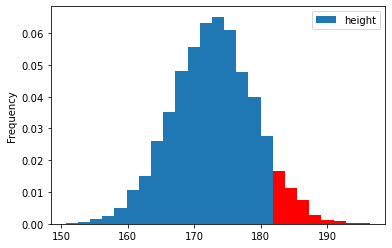

In [15]:
p= normal_sample.plot.hist(y='height', bins=25, density=True)

for rectangle in p.patches:
    if rectangle.get_x() >= 180:
        rectangle.set_facecolor('red')

### 정규분포: 확률밀도함수

이제 정규분포 $𝑁(172.7,6.22^2)$의 확률밀도함수 $f(x; \mu,\sigma)$를 그리고 $x$의 값이 180 이상인 구간의 면적을 구해보자.

먼저 정규분포 $𝑁(172.7,6.22^2)$ 를 `normal_distribution` 이라는 이름으로 만들어 보자.

아레 코드에서 라이브러리 `scipy.stats` 를 `stats` 로 부른 후에

```
import scipy.stats as stats
```

평균이 `mean` 이고 표준편차가 `std`인 정규분포를 함수 `stats.norm(mean,std)`로 만들 수 있다..

```
normal_distribution=stats.norm(mean,std)
```


In [16]:
#평균이 172.7 이고 표준편차가 6.22 인 정규분포를 지정
mean=172.7
std=6.22
normal_distribution=stats.norm(mean,std)


아래 그림은 정규분포 $𝑁(172.7,6.22^2)$의 확률밀도함수 $f(x; \mu,\sigma)$를 그래프로 그린 후에 $x$ 가 180 이상인 부분만 빨간 색으로 표시한 그림이다. 

아래에서 제시된 정규분포 그래프를 그리는 코드는 우리 강의의 범위를 벗어나므로 문법을 익히지 않아도 된다.  

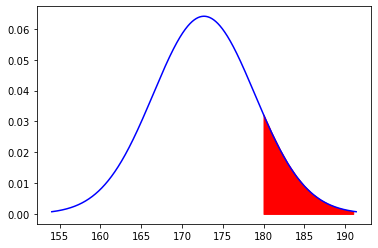

In [17]:

#아래 코드는 우리 강의의 범위를 벗어나므로 문법을 익히지 않아도 된다.
heights=np.linspace(mean-3*std, mean+3*std,10000)
plt.plot(heights,normal_distribution.pdf(heights),'b')

tall=np.arange(180,mean+3*std ,1)
plt.fill_between(tall,normal_distribution.pdf(tall),color='r')

정규분포 $𝑁(172.7,6.22^2)$의 확률밀도함수 $f(x; \mu,\sigma)$를 그린 후에 $x$의 값이 180 이상인 구간의 면적은 다음과 같은 적분식으로 나타낼 수 있다. 전체 그래프의 면적은 1이고  빨간 색 부분의 면적인 0.12027 이다.  


$$
\begin{align*}
 P(x \ge 180) & = 1 - P(x \le 180)  \\
 & =  1 - \int_{-\infty}^{180} f(z; \mu,\sigma) ~dz  \\
 & = 0.12027
\end{align*} 
$$

위의 식에서 $\mu = 172.7$, $\sigma=6.22$ 이다.

여러분은 적분(integration)의 정의와 방법에 대해서 몰라도 된다.  적분은 그래프에서 주어진 부분의 면적을 구하라는 함수라고 생각하자.

In [18]:
# 평균이 172.7이고 표준편차가 6.22 인 정규분포에서 180이상인 값이 임의로 추출될 확률
1.0 - normal_distribution.cdf(180)

0.12027094038001529

정규분포 $𝑁(172.7,6.22^2)$ 에서 10,000 명의 키를 임의로 추출하여 만든 자료, 즉 확률 실험을 이용하여 만든 자료에서 구한 180 cm 이상인 성인의 비율과 정규분포 그래프에서 면적으로 구한 확률은 아주 가깝게 나타난다.

아래 코드에서 메소드 `cdf(x)` 다음과 같이 정규분포의 주어진 값까지의 면적, 즉 확률을 구해준다.

$$
P(x \le x_0)  = \int_{-\infty}^{x_0} f(z; \mu,\sigma) ~dz ={\texttt{normal_distribution.cdf}(x_0)}
$$

In [19]:
normal_distribution.cdf(180)

0.8797290596199847

In [20]:
normal_distribution.cdf(172.7)

0.5

In [21]:
normal_distribution.cdf(160.0)

0.02058565522616494

In [22]:
normal_distribution.cdf(np.Inf) # np.Inf 는 무한대를 뜻한다.

1.0

### 확률의 덧셈 


위에서 주사위를 던지는 경우 5의 눈이 나올 사건과 6의 눈이 나올 사건은 동시에 일어날 수 없다. 주사위를 던지면 5가 나오던지 6이 나오던지 둘 중에 하나의 사건만 일어나야 한다. 

**이렇게 가능한 결과들이 동시에 일어나지 못하는 경우 사건의 확률은 각 가능한 결과의 확률을 더해 주면 된다.**

체력측정 자료에서도 920명의 남자들 중에 1명을 임의로 뽑는다면, 예를 들어 철수(185cm)와 용희(190cm)가 동시에 뽑힐 수 없다. 따라서 키가 180 이상인  남성들이 106명이므로 1명이 뽑힐 확률(1/920)을 106번 더해주면 된다.  

조금 더 이론적으로 말하자면 두 개의 사건이 동시에 일어날 수 없는 경우, 즉 서로 배반(mutually exclusive)인 경우 두 사건 중 하나의 사건이 일어날 확률은 각각의 사건의 확률을 더해주면 된다. 

두 개의 사건 $A$와 $B$ 가 서로 배반이면,  두 사건 중 하나가 일어날 사건($A \cup B$)의 확률은 각각의 확률을 더해주면 된다.

$$ \text{if } A \cap B = \emptyset, \text{ then } P(A \cup B) = P(A) + P(B) $$




## 독립 시행


### 두 개의 동전


**하나의 동전을 두 번 연속으로 던졌을 때** 앞면이 한 번 나올 확률은 얼마인가?

동전을 두 번 연속으로 던지면 첫 번째 결과와 두 번째 결과의 조합으로 가능한 모든 사건(표본 공간)은 다음과 같이 4 가지이다.
또한 4개의 가능한 결과는 모두 가능성이 같다.

$$\{ \text{(앞면, 앞면)},~ \text{(앞면, 뒷면)}, \text{(뒷면, 앞면)}, \text{(뒷면, 뒷면)} \} $$

앞면이 한 번 나올 사건은 $\text{(앞면, 뒷면)}$, $\text{(뒷면, 앞면)}$  두 개이고 두 사건은 동시에 일어날 수 없으므로 확률은 다음과 같다. 


$$
\begin{align*}
P(\text{앞면이 한 번}) & = \frac {\text{사건} (event) \text{ 안의 원소의 수}} {\text{표본 공간 }S \text{ 안의 원소의 수}} \\
& = \frac{2}{4} \\
 & = \frac{1}{4} + \frac{1}{4} \\
 & = P(\text{(앞면, 뒷면)})  + P(\text{(뒷면, 앞면)}) 
\end{align*}
$$

**만약 두 개의 동전을 동시에 던졌을 때도** 위와 같이 모든 가능한 결과가 4개인가? 누군가가 "두 개의 동전이 똑같이 생겨서 구분할 수 없으니 가능한 결과는 $\text{(앞면, 앞면)}$,$\text{(앞면, 뒷면)}$, $\text{(뒷면, 뒷면)}$, 즉  3가지이고 각각의 확률은 1/3 이다" 라고 주장하면 여러분은 어떻게 대답할 것인가? 


### 독립 시행과 표본공간

위의 예제에서 하나의 동전을 두 번 연속 던지거나, 두 개의 동전을 동시에 던지거나 두 개의 결과가 나온다. 어떻게 던지든 하나의 결과가 다른 결과에 영향을 미치는지 생각해 보자.

우리는 하나의 동전을 두 번 던지든, 두 개의 동전을 동시에 던지든지 **가능한 두 개의 결과가 서로 영향을 준다고 생각하지 않는다**. 이 말을 확률에서 사용하는 용어로 두 결과는 **서로 독립적(independent)** 으로 일어난다는 의미이다. 

이렇게 두 개 이상의 사건이 독립적인 일어나는 것을 독립 시행(indendent trial) 이라고 부른다. 두 사건이 일어나는 경우, 서로 독립이면 무엇이 먼저 일어나든 상관이 없고 중요한 것은 가능한 모든 결과를 포함하는 표본공간이 만들어 지는 구조이다. 


두 개의 사건이 서로 독립이면, 두 사건의 가능한 결과를 가진 표본 공간은 각각의 사건에 대한 **표본공간으로부터 얻어지는 모든 가능한 조합** 으로 구성된다.  

하나의 동전을 던질 때 표본 공간은 $\{\text{(앞면), (뒷면 )} \}$으로 두 개이다. 하나의 동전을 두 번 던지든, 두 개의 동전을 동시에 던지든지  두 개의 결과는 독립이므로 두 개의 표본 공간, 즉 $\{\text{(앞면), (뒷면 )} \}$ 과 $\{\text{(앞면), (뒷면 )} \}$의 모든 조합을 생각하면 $2 \times 2 = 4$ 개의 가능한 결과를 가지는 표본공간을 얻는다.

$$ \{\text{(앞면), (뒷면 )} \} \times \{\text{(앞면), (뒷면 )} \} =\{ \text{(앞면, 앞면)},~ \text{(앞면, 뒷면)}, \text{(뒷면, 앞면)}, \text{(뒷면, 뒷면)} \} $$



###  확률의 곱셈

일단 앞면이 한번 나올 사건은 (앞면, 뒷면)과 (뒷면, 앞면)으로 2개이며 동시에 일어날 수 없다. 따라서 두 사건의 확률은 더해준다. 

또한 독립 시행으로 나온 결과에 대한 확률은 각각의 사건의 확률을 곱하여 구할 수 있다.


$$
\begin{align*}
P[\text{앞면이 한 번}] & =𝑃[(\text{앞면, 뒷면 }) \cup (\text{ 뒷면, 앞면})] \\
& =𝑃[(\text{앞면, 뒷면})] +𝑃[(\text{뒷면, 앞면})] \\
  & = 𝑃[(\text{앞면})] P[(\text{뒷면}))] + P[(\text{뒷면})]𝑃[(\text{앞면})]  \\
  & = \frac{1}{2} \times \frac{1}{2} + \frac{1}{2} \times \frac{1}{2} \\
  & = \frac{2}{4} \\
 \end{align*}
$$



이론적으로 말하자면 두 개의 사건의 결과가 서로 영향을 받지 않는 경우, 즉  **두 사건이 서로 독립(independnet)인 경우 두 개의 사건의 결과에 대한 확률은 각각의 사건의 확률을 곱해주면 된다.** 

두 개의 사건 $A$와 $B$ 가 서로 독립이면, 두 사건의 결과($A \cap B)$에 대한 확률은 각각의 확률을 곱해주면 된다.

$$ \text{if } A , B \text{ are independnet}, \text{ then } P(A \cap B) = P(A)  P(B) $$


다른 예로서 동전 한 개와 주사위 한 개를 던질 때 표본공간은 무었일까?

우리는 모든 가능한 경우가 $2 \times 6 = 12$ 개인 것을 알 수 있다. 그런데 저자가 모든 가능한 경우를 써보려고 하니 손가락이 아플 것 같다. 

파이썬 프로그램의 도움을 받아서 표본공간을 만들어보자

In [23]:
coin = ["앞", "뒤"]  # 동전의 표본 공간
coin

['앞', '뒤']

In [24]:
dice = [1,2,3,4,5,6] # 주사위의 표본 공간
dice

[1, 2, 3, 4, 5, 6]

라이브러리 `itertools` 에서 함수 `product`를 불러온다. 

```
from itertools import product
```

 함수 `product(coin, dice)`는 앞에서 정의한 `coin` 과 `dice`의 모든 원소들의 조합을 구해주는 것이다. 유의할 점은 `product(coin, dice)` 의 결과를 다시 리스트 `list()`로 만들어 주어야 결과가 나타난다.

In [25]:
list(product(coin, dice))

[('앞', 1),
 ('앞', 2),
 ('앞', 3),
 ('앞', 4),
 ('앞', 5),
 ('앞', 6),
 ('뒤', 1),
 ('뒤', 2),
 ('뒤', 3),
 ('뒤', 4),
 ('뒤', 5),
 ('뒤', 6)]

동전 한개와 주사위 한 개를 던질 때, 동전은 앞면이 나오고 주사위은 5 이상이 나올 확률은 얼마인가?


$$
\begin{align*}
P(\text{앞면} \cap \text{눈이 5 이상}) & = \frac {\text{사건} (event) \text{ 안의 원소의 수}} {\text{표본 공간 }S \text{ 안의 원소의 수}} \\
& = \frac{2}{12} \\
& = P(\text{앞면}) \times P(\text{눈이 5 이상}) \\
 & = \frac{1}{2} \times \frac{2}{6} 
\end{align*}
$$

주사위를 먼저 던지거나, 동전을 먼저 던지거나 또는 동전과 주사위를 동시에 던지거나 두 사건이 독립이면 확률의 계산 방법은 동일하다.


윷놀이를 하는 경우 표본공간을 구해보자. 함수 `product`의 선택명령문 `repeat=4` 는 `yut`에 있는 2개의 가능한 결과를 4번 반복하여 조합하라는 의미이다.

$$ \text{(등, 배)} \times \text{(등, 배)} \times \text{(등, 배)} \times \text{(등, 배)} $$


In [26]:
yut = ["등", "배"]
list(product(yut, repeat=4))

[('등', '등', '등', '등'),
 ('등', '등', '등', '배'),
 ('등', '등', '배', '등'),
 ('등', '등', '배', '배'),
 ('등', '배', '등', '등'),
 ('등', '배', '등', '배'),
 ('등', '배', '배', '등'),
 ('등', '배', '배', '배'),
 ('배', '등', '등', '등'),
 ('배', '등', '등', '배'),
 ('배', '등', '배', '등'),
 ('배', '등', '배', '배'),
 ('배', '배', '등', '등'),
 ('배', '배', '등', '배'),
 ('배', '배', '배', '등'),
 ('배', '배', '배', '배')]

## 요약

앞에서 배운 논리적 확률의 기초적인 개념과 계산 규칙을 정리하면 다음과 같다.

- 표본 공간 (sample space) : 모든 가능한 결과를 모아 놓은 집합으로 $S$ 로 표기한다. 
- 사건 (event): 표본 공간 $S$ 의 부분 집합

  
-  표본 공간에 속한 모든 결과들의 가능성이 같다고 할 때 어떤 사건($A$)이 일어날 확률은 다음과 같이 계산할 수 있다.

  $$ P(A) = \frac {\text{사건} A \text{ 안의 원소의 수}} {\text{표본 공간 }S \text{ 안의 원소의 수}}  $$



- 표본공간의 확률은 1이다. 즉, 가능한 모든 사건이 일어날 확률은 1이다

  $$ P(S) = 1 $$

- 여사건($A^c$)의 확률은 1에서 주어진 사건($A$)의 확률을 빼면 된다.

  $$ P(A^c) = 1 -P(A) $$

- 두 개의 사건 $A$와 $B$ 가 서로 배반이면,  두 사건 중 하나가 일어날 사건($A \cup B$)의 확률은 각각의 확률을 더해주면 된다.

  $$ \text{if } A \cap B = \emptyset, \text{ then } P(A \cup B) = P(A) + P(B) $$

- 두 개의 사건 $A$와 $B$ 가 서로 독립이면, 두 사건의 결과($A \cap B)$에 대한 확률은 각각의 확률을 곱해주면 된다.

  $$ \text{if } A , B \text{ are independnet}, \text{ then } P(A \cap B) = P(A)  P(B) $$
